In [1]:
from astropy.table import Table
import glob

In [8]:
%matplotlib inline
import pylab as pl
import numpy as np

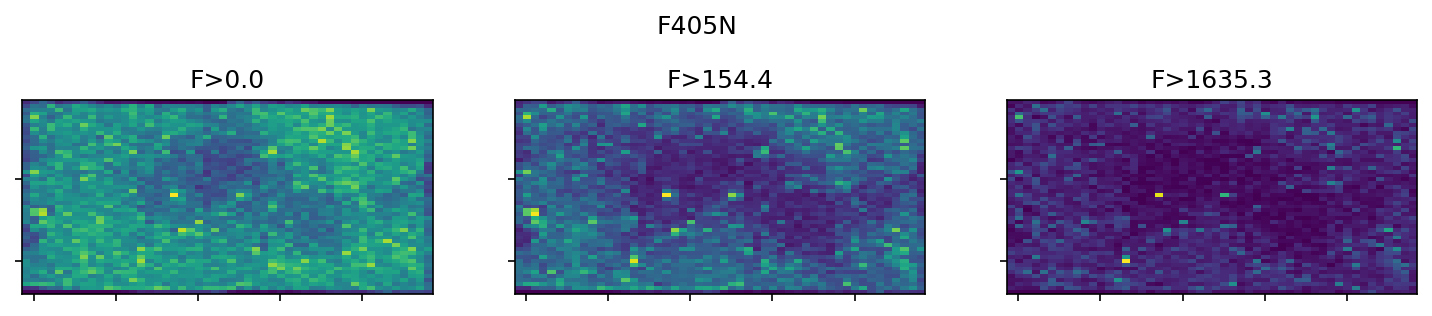

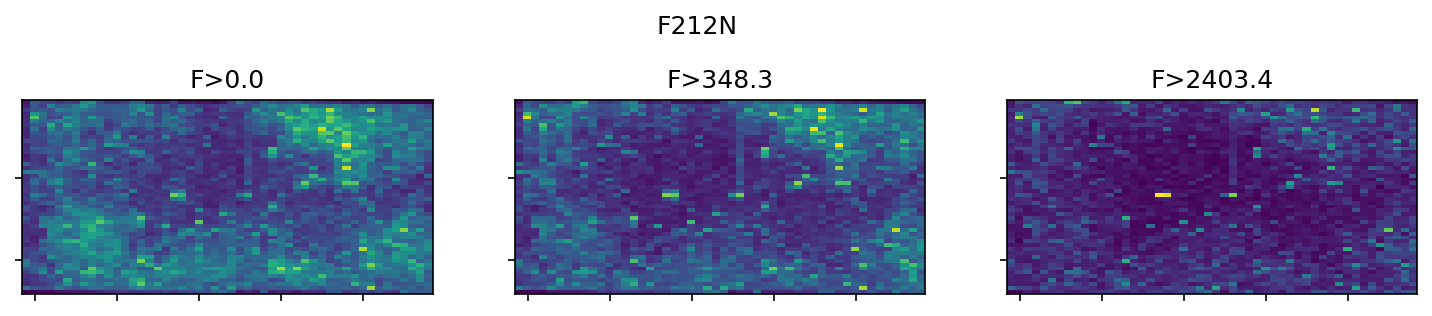

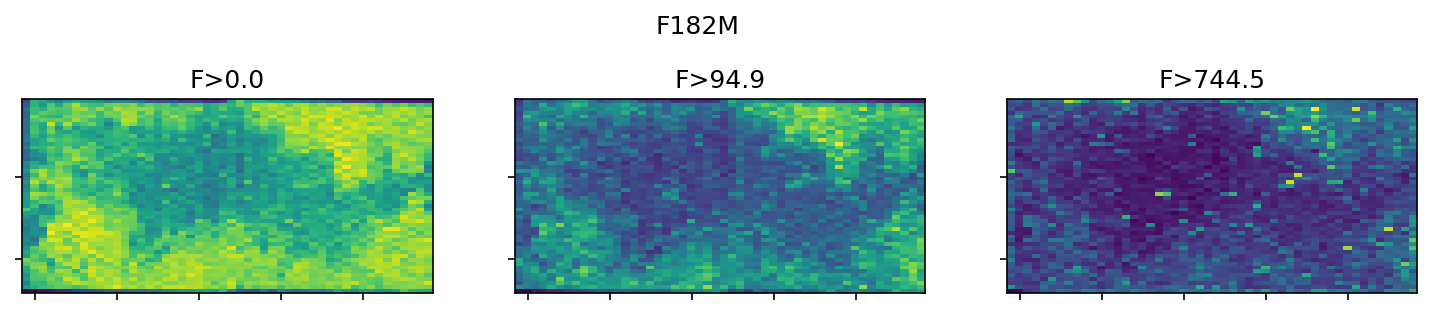

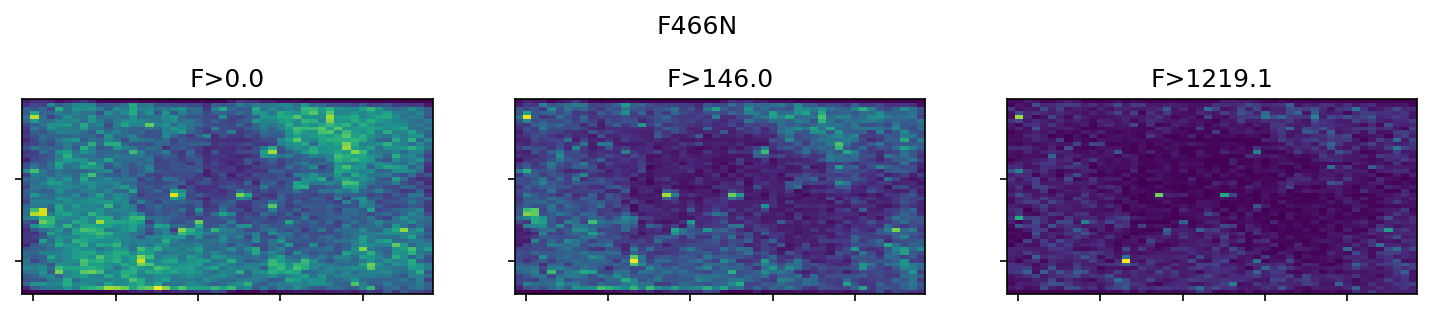

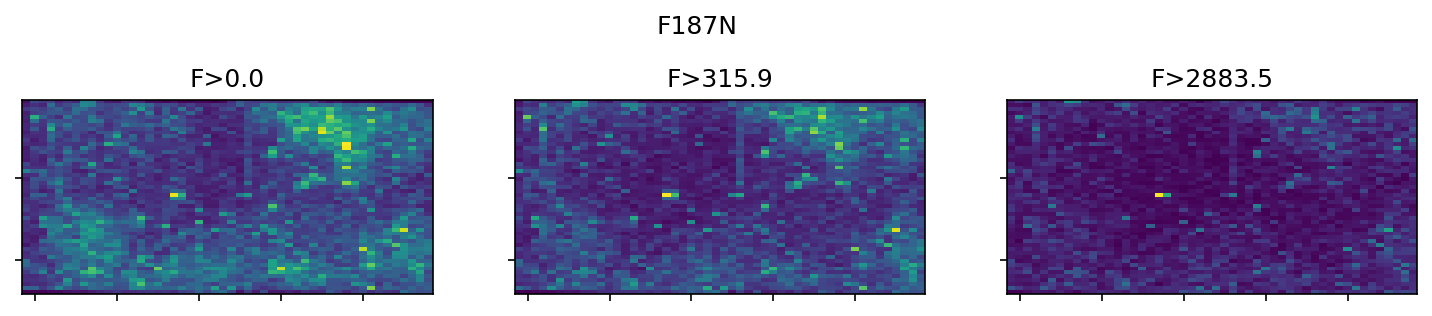

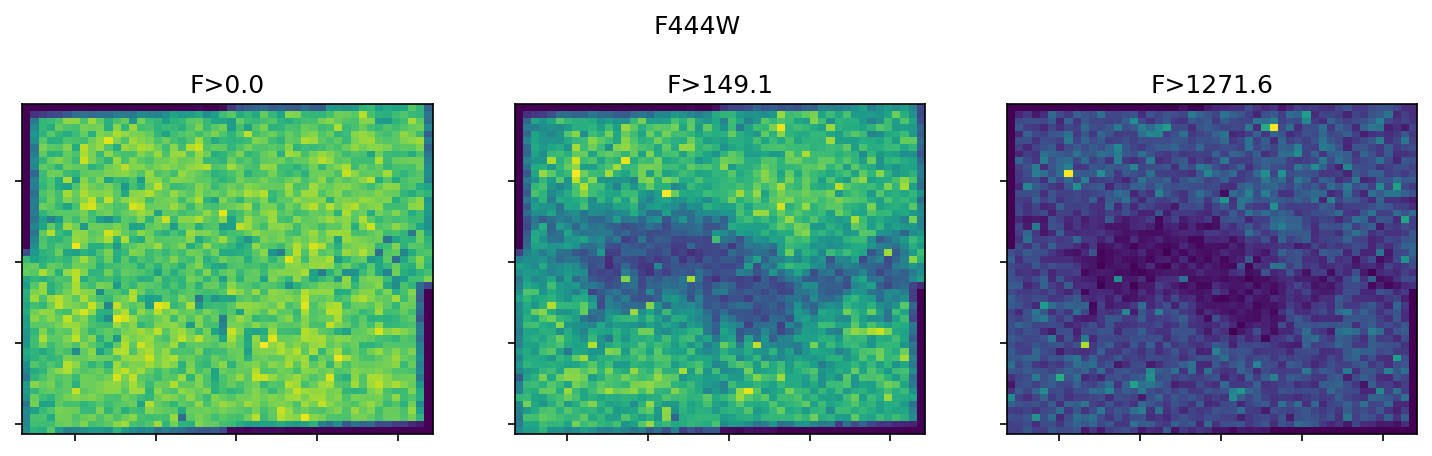

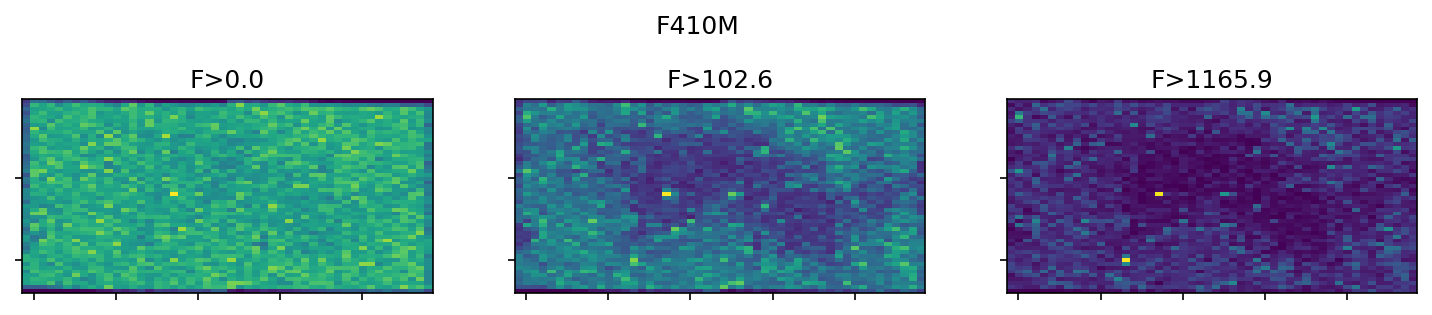

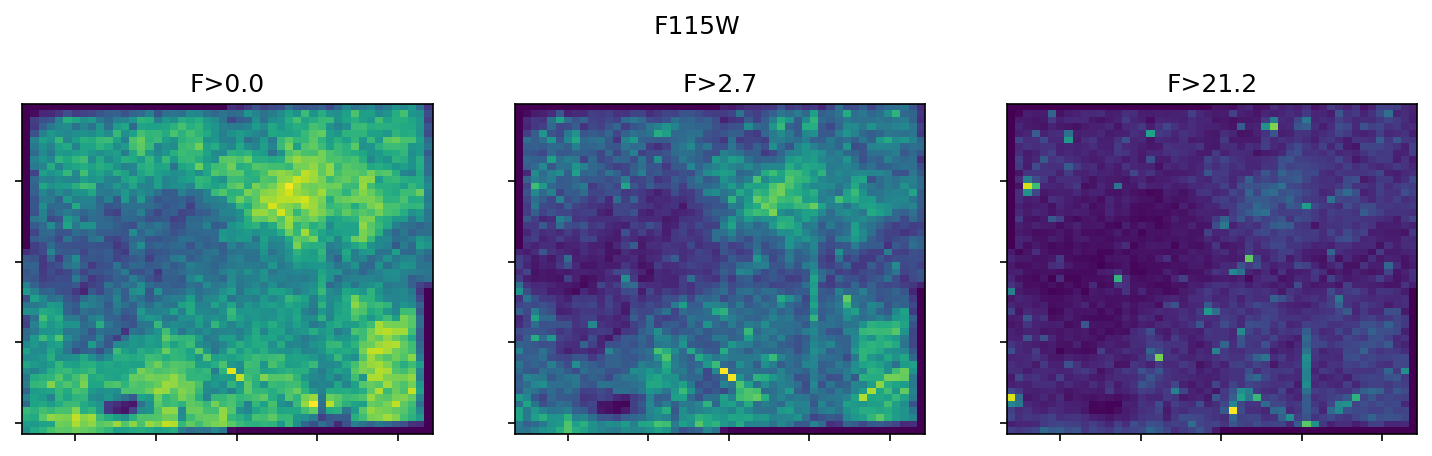

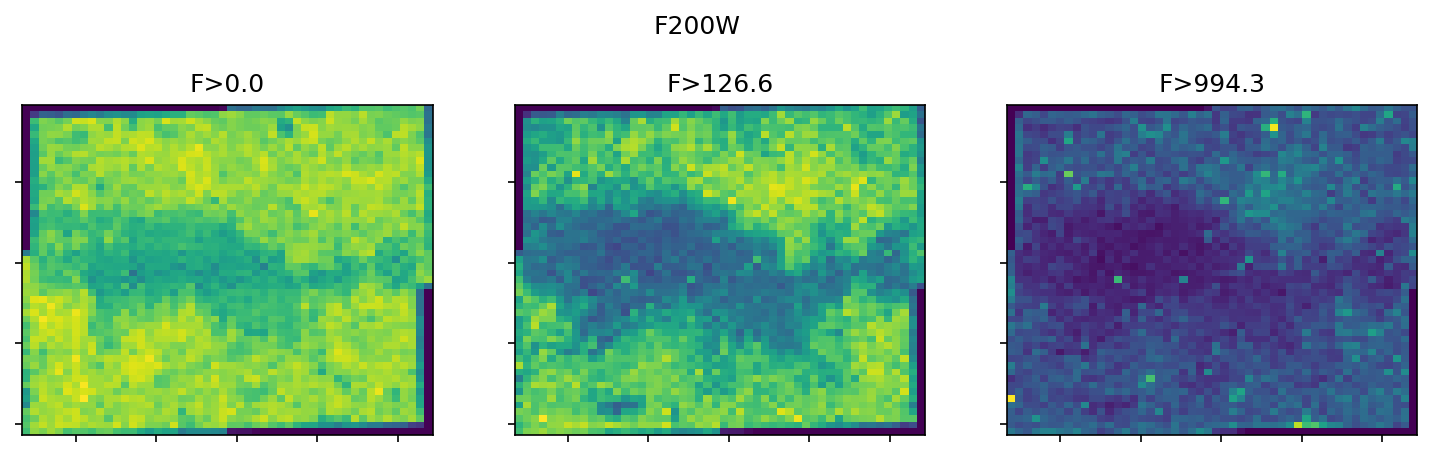

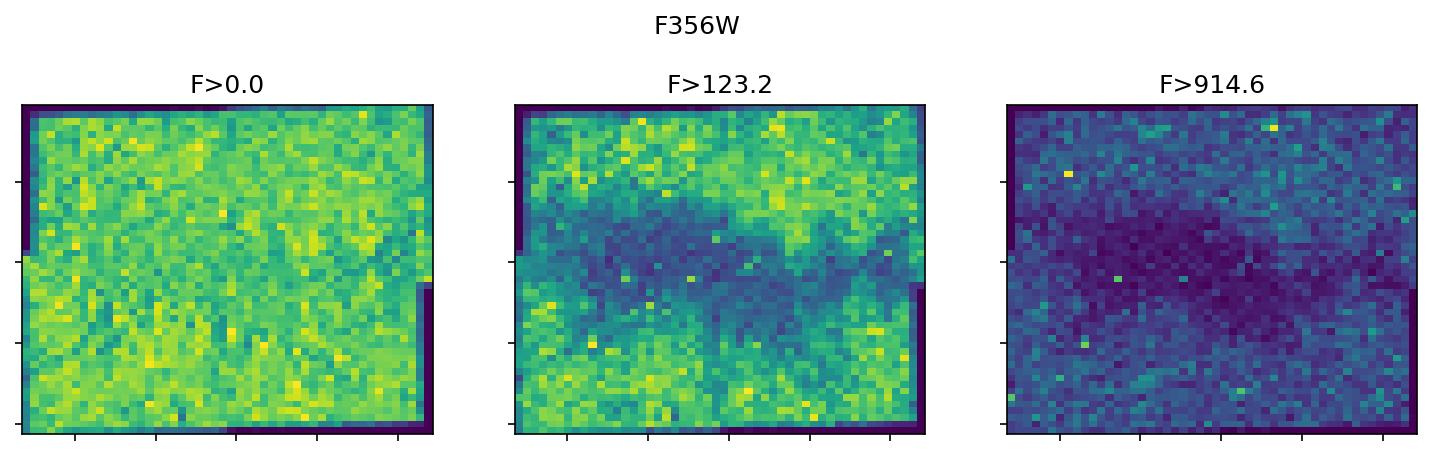

In [20]:
basepath = '/orange/adamginsburg/jwst/brick'
for dirpath in glob.glob(f'{basepath}/F*'):
    catname = glob.glob(f'{dirpath}/*_merged_crowdsource_nsky0.fits')[0]
    
    filtername = catname.split("/")[-2]
    
    tbl = Table.read(catname)
    
    if 'W' in filtername:
        fig = pl.figure(figsize=(12, 3.5), dpi=150)
    else:
        fig = pl.figure(figsize=(12, 2.5), dpi=150)
    
    crds = tbl['skycoord']
    flux = tbl['flux']
    for ii, thresh in enumerate((0, np.percentile(flux, 50), np.percentile(flux, 90))):
        ax = pl.subplot(1, 3, ii+1)
        sel = flux > thresh
        ax.hist2d(crds.dec[sel].value, crds.ra[sel].value, bins=(50,50));
        ax.set_title(f"F>{thresh:0.1f}")
        ax.set_aspect('equal')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    fig.suptitle(filtername)

In [3]:
tbl['skycoord']

<SkyCoord (ICRS): (ra, dec) in deg
    [(266.49793421, -28.73534786), (266.49797418, -28.73496256),
     (266.4979465 , -28.73454815), ..., (266.57888922, -28.65340245),
     (266.57825169, -28.68660244), (266.57827757, -28.68593705)]>